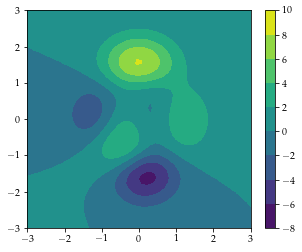

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import numpy as np
from utils import peaks, plot_peaks, feas

plot_peaks()

In [2]:
from sumomo import DataHandler


n = 100    # number of samples
space = [[-3.0, 3.0],[-3.0, 3.0]]  # input space

dh = DataHandler()  # initialise DataHandler
dh.init(n, space)   # initialise input samples, x
dh.y = peaks(dh.x)  # save output samples, y
dh.t = feas(dh.x)   # save class targets, t

dh.split(test_size=0.3)  # train-test split
dh.scale()    # standardise data

In [3]:
from sumomo import GPR, GPC

regressor = GPR()   # build GP for regression
classifier = GPC()  # build GP for classification

# fit regression GP to feasible scaled training data
regressor.fit(
    dh.x_train_[dh.t_train.ravel()==1, :], 
    dh.y_train_[dh.t_train.ravel()==1]
)

# fit classification NN to scaled training data
classifier.fit(
    dh.x_train_, 
    dh.t_train
)

In [4]:
from sumomo import Validator


def validation_metrics(classifier, regressor, dh, tester=None, nn_class=False):
    if tester is None:
        v = Validator(model=classifier)
        v.calculate(dh.x_test_, dh.t_test, nn_class=nn_class)

#         print('{:10} {:12}'.format('metric', 'value'))
#         print('{:10} {:<12.3f}'.format('accuracy', v.accuracy))
#         print('{:10} {:<12.3f}'.format('precision', v.precision))
#         print('{:10} {:<12.3f}'.format('recall', v.precision))
#         print('{:10} {:<12.3f}'.format('F1', v.f1))
#         print('{:10} {:<12.3f}'.format('log loss', v.log_loss))

        class_test = classifier.predict(dh.x_test_, return_class=True)[1]

        v1 = Validator(model=regressor, scaler=dh)
        v1.calculate(dh.x_test_, dh.y_test)
        v2 = Validator(model=regressor, scaler=dh)
        v2.calculate(dh.x_test_[class_test.ravel() == 1, :], dh.y_test[class_test == 1])
        v3 = Validator(model=regressor, scaler=dh)
        v3.calculate(dh.x_test_[dh.t_test.ravel()==1, :], dh.y_test[dh.t_test==1])

#         print('{:10} {:12} {:12} {:12}'.format('metric', 'all testing', 'predicted 1', 'actual 1'))
#         print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MAE', v1.mae, v2.mae, v3.mae))
#         print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MSE', v1.mse, v2.mse, v3.mse))
#         print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MAPE', v1.mape, v2.mape, v3.mape))
#         print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MEDAE', v1.median_ae, v2.median_ae, v3.median_ae))
#         print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('EVS', v1.evs, v2.evs, v3.evs))
#         print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('R2', v1.r2, v2.r2, v3.r2))
#         print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MAXE', v1.maxe, v2.maxe, v3.maxe))
        return [v.accuracy, v.precision, v.precision, v.f1, v.log_loss, v3.mae, v3.mse, v3.mape, v3.median_ae, v3.evs, v3.r2, v3.maxe]
    else:
        v = Validator(model=classifier)
        v.calculate(tester.x_, tester.t, nn_class=nn_class)

#         print('{:10} {:12}'.format('metric', 'value'))
#         print('{:10} {:<12.3f}'.format('accuracy', v.accuracy))
#         print('{:10} {:<12.3f}'.format('precision', v.precision))
#         print('{:10} {:<12.3f}'.format('recall', v.recall))
#         print('{:10} {:<12.3f}'.format('F1', v.f1))
#         print('{:10} {:<12.3f}'.format('log loss', v.log_loss))

        class_test = classifier.predict(tester.x_, return_class=True)[1]

        v1 = Validator(model=regressor, scaler=dh)
        v1.calculate(tester.x_, tester.y)
        v2 = Validator(model=regressor, scaler=dh)
        v2.calculate(tester.x_[class_test.ravel() == 1, :], tester.y[class_test == 1])
        v3 = Validator(model=regressor, scaler=dh)
        v3.calculate(tester.x_[tester.t.ravel()==1, :], tester.y[tester.t==1])

#         print('{:10} {:12} {:12} {:12}'.format('metric', 'all testing', 'predicted 1', 'actual 1'))
#         print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MAE', v1.mae, v2.mae, v3.mae))
#         print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MSE', v1.mse, v2.mse, v3.mse))
#         print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MAPE', v1.mape, v2.mape, v3.mape))
#         print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MEDAE', v1.median_ae, v2.median_ae, v3.median_ae))
#         print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('EVS', v1.evs, v2.evs, v3.evs))
#         print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('R2', v1.r2, v2.r2, v3.r2))
#         print('{:10} {:<12.3f} {:<12.3f} {:<12.3f}'.format('MAXE', v1.maxe, v2.maxe, v3.maxe))
        return [v.accuracy, v.precision, v.precision, v.f1, v.log_loss, v3.mae, v3.mse, v3.mape, v3.median_ae, v3.evs, v3.r2, v3.maxe]
metrics = validation_metrics(classifier, regressor, dh)

In [5]:
import pyomo.environ as pyo
from sumomo import BlockFormulation


# larger optimisation formulation
omo = pyo.ConcreteModel()
omo.n_inputs = set(range(len(space)))
omo.inputs = pyo.Var(omo.n_inputs, bounds=dh.space_)
omo.output = pyo.Var()
omo.proba = pyo.Var()
omo.feasibility_con = pyo.Constraint(expr= omo.proba >= 0.5 )
omo.obj = pyo.Objective(expr=omo.output, sense=pyo.maximize)

# formulate pyomo blocks for gpr and gpc
omo.mdl = pyo.Block(rule=BlockFormulation(regressor).rule())
omo.feas = pyo.Block(rule=BlockFormulation(classifier).rule())

# connect pyomo model input and output to the surrogate models
omo.c = pyo.ConstraintList()
for i in omo.n_inputs:
    omo.c.add( omo.inputs[i] == omo.mdl.inputs[i] )
    omo.c.add( omo.inputs[i] == omo.feas.inputs[i] )
omo.c.add( omo.output == omo.mdl.outputs[0] )
omo.c.add( omo.proba == omo.feas.outputs[0] )

In [6]:
# solver setup
solver = pyo.SolverFactory('baron')
solver.options['MaxTime'] = 60
# macOS requires CplexLibName option to be specified, please change accordingly
solver.options['CplexLibName'] = "/Applications/CPLEX_Studio201/cplex/bin/x86-64_osx/libcplex2010.dylib"
# solve
results = solver.solve(omo, tee=True)

# inverse scale solution
x = np.fromiter(omo.inputs.extract_values().values(), dtype=float).reshape(1, -1)
solution = dh.inv_scale_x(x).ravel()

# inverse scale objective and corresponding predictions
obj = dh.inv_scale_y(np.array(omo.output.value).reshape(1, -1))
pred = dh.inv_scale_y(regressor.predict(x.reshape(1, -1)))

# compare optimisation outputs with model prediction
print()
print('{:18} {:12}'.format('variable', 'value'))
print('{:18} {:<12.8f}'.format('x1*', solution[0]))
print('{:18} {:<12.8f}'.format('x2*', solution[1]))
print('{:18} {:<12.8f}'.format('omo obj at x*', obj[0][0]))
print('{:18} {:<12.8f}'.format('pred at x*', pred[0][0]))
print('{:18} {:<12.8f}'.format('omo proba', omo.proba.value))
print('{:18} {:<12.8f}'.format('proba pred at x*', classifier.predict(x.reshape(1, -1)).item()))

 BARON version 22.4.20. Built: OSX-64 Wed Apr 20 10:52:09 EDT 2022

 BARON is a product of The Optimization Firm.
 For information on BARON, see https://minlp.com/about-baron
 Licensee: Benoit Chachuat at Imperial College London, b.chachuat@imperial.ac.uk.

 If you use this software, please cite publications from
 https://minlp.com/baron-publications, such as: 

 Khajavirad, A. and N. V. Sahinidis,
 A hybrid LP/NLP paradigm for global optimization relaxations,
 Mathematical Programming Computation, 10, 383-421, 2018.
 This BARON run may utilize the following subsolver(s)
 For LP/MIP/QP: CLP/CBC, ILOG CPLEX                             
 For NLP: IPOPT, FILTERSQP
 Doing local search
 Preprocessing found feasible solution with value 0.723308627836     
 Solving bounding LP
 Starting multi-start local search
 Preprocessing found feasible solution with value  2.78314883505     
 Done with local search
  Iteration    Open nodes         Time (s)    Lower bound      Upper bound
          1    

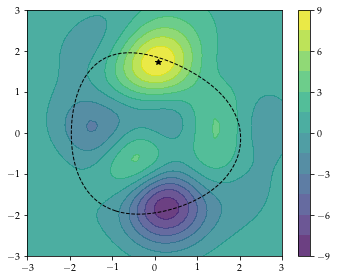

In [7]:
import matplotlib.pyplot as plt


x1, x2 = np.linspace(-3, 3, 50), np.linspace(-3, 3, 50)
x1grid, x2grid = np.meshgrid(x1, x2)
x_new = np.c_[x1grid.ravel(), x2grid.ravel()]
x_scaled = dh.scale_x(x_new)

pred = regressor.predict(x_scaled)
pred = dh.inv_scale_y(pred)
pred = pred.reshape(x1grid.shape)

prob = classifier.predict(x_scaled)
prob = prob.reshape(x1grid.shape)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
c = ax.contourf(x1, x2, pred, levels=12, alpha=0.8)
ax.contour(x1, x2, prob, levels=[0.5], linestyles='dashed', colors='k', linewidths=1)
ax.plot(solution[0], solution[1], 'k*')
fig.colorbar(c)

plt.tight_layout()

# AdaptiveSampler

* Use different `solver` configurations for heuristic solve in adaptive sampling, e.g. baron with only multi local search or other heuristic solvers.
* Constrained and unconstrained by classifier, include discussion of training regressor only on feasible samples.
* How to integrate new samples into DataHandler and continue sampling?
* Relax feasibility constraints to enable updating of classification model at boundary?
* Use `_gpr_std_rule` formulation within multi-objective optimisation.
* Termination/convergence criteria?
* Delaunay triangle adaptive sampling with feasibility constraints?

In [15]:
from sumomo import AdaptiveSampler

ads = AdaptiveSampler(dh.space_, regressor, classifier)
mod = ads.max_constrained_gp_std()
res = solver.solve(mod, tee=True)
x = np.fromiter(mod.inputs.extract_values().values(), dtype=float).reshape(1, -1)
x = dh.inv_scale_x(x).ravel()
print(x)

mod = ads.max_constrained_triangle(dh.x_train_)
res = solver.solve(mod, tee=False)
x01 = np.fromiter(mod.inputs.extract_values().values(), dtype=float).reshape(1, -1)
x01 = dh.inv_scale_x(x01).ravel()
print(x01)

mod = ads.exploit_constrained_triangle(dh.x_train_, dh.y_train_, sense='max')
res = solver.solve(mod, tee=False)
x02 = np.fromiter(mod.inputs.extract_values().values(), dtype=float).reshape(1, -1)
x02 = dh.inv_scale_x(x02).ravel()
print(x02)

# # unconstrained expected improvement
# ei = AdaptiveSampler(dh.space_, regressor)
# new_ei = ei.expected_improvement(dh.y_train_)
# new_ei = dh.inv_scale_x(new_ei).ravel()

# # unconstrained modified expected improvement
# mei = AdaptiveSampler(dh.space_, regressor)
# new_mei = ei.expected_improvement(dh.y_train_, aquisition='modified')
# new_mei = dh.inv_scale_x(new_mei).ravel()

# # constrained modified expected improvement
# con_mei = AdaptiveSampler(dh.space_, regressor, classifier)
# new_con_mei = con_mei.expected_improvement(dh.y_train_, solver=solver)
# new_con_mei = dh.inv_scale_x(new_con_mei).ravel()

# print('maximised GP variance: {}'.format(new_cons))
# print('Delaunay triangulation: {}'.format(new_dt))
# print('expected improvement: {}'.format(new_ei))
# print('modified expected improvement: {}'.format(new_mei))
# print('exploit Delaunay triangulation: {}'.format(new_exp_dt))
# print('constrained modified expected improvement: {}'.format(new_con_mei))

 BARON version 22.4.20. Built: OSX-64 Wed Apr 20 10:52:09 EDT 2022

 BARON is a product of The Optimization Firm.
 For information on BARON, see https://minlp.com/about-baron
 Licensee: Benoit Chachuat at Imperial College London, b.chachuat@imperial.ac.uk.

 If you use this software, please cite publications from
 https://minlp.com/baron-publications, such as: 

 Khajavirad, A. and N. V. Sahinidis,
 A hybrid LP/NLP paradigm for global optimization relaxations,
 Mathematical Programming Computation, 10, 383-421, 2018.
 This BARON run may utilize the following subsolver(s)
 For LP/MIP/QP: CLP/CBC, ILOG CPLEX                             
 For NLP: IPOPT, FILTERSQP
 Doing local search
 Preprocessing found feasible solution with value -1.51007017225     
 Solving bounding LP
 Starting multi-start local search
 Done with local search
  Iteration    Open nodes         Time (s)    Lower bound      Upper bound
          1             1             2.07    -1.51007          2547.81    
        2

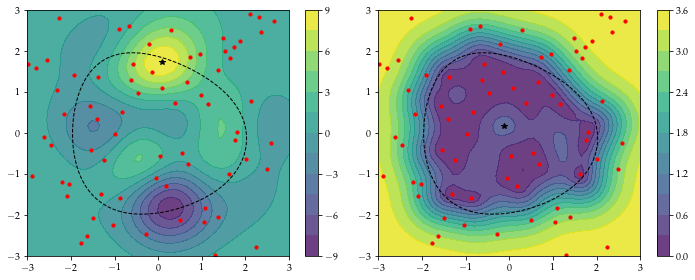

In [16]:
u = regressor.predict(x_scaled, return_std=True)[1]
u = u * dh.y_train_std
u = u.reshape(x1grid.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
c1 = ax1.contourf(x1, x2, pred, levels=12, alpha=0.8)
ax1.contour(x1, x2, prob, levels=[0.5], linestyles='dashed', colors='k', linewidths=1)
ax1.scatter(dh.x_train[:, 0], dh.x_train[:, 1], c='r', s=10)
ax1.plot(solution[0], solution[1], 'k*')
fig.colorbar(c1, ax=ax1)

c2 = ax2.contourf(x1, x2, u, levels=12, alpha=0.8)
ax2.contour(x1, x2, prob, levels=[0.5], linestyles='dashed', colors='k', linewidths=1)
ax2.scatter(dh.x_train[:, 0], dh.x_train[:, 1], c='r', s=10)
ax2.plot(x[0], x[1], 'k*')
fig.colorbar(c2, ax=ax2)

plt.tight_layout()

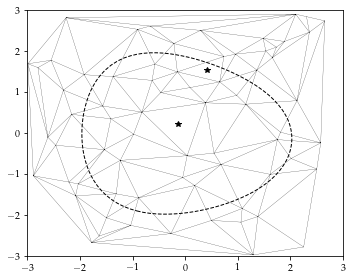

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.triplot(dh.x_train[:, 0], dh.x_train[:, 1], ads.delaunay.simplices, c='k', lw=0.2)
ax.contour(x1, x2, prob, levels=[0.5], linestyles='dashed', colors='k', linewidths=1)
ax.plot(x01[0], x01[1], 'k*')
ax.plot(x02[0], x02[1], 'k*')

plt.tight_layout()

In [ ]:
ei_pred = ei._ei(x_scaled, dh.y_train_, sense='max', xi=0.0)
ei_pred = ei_pred.reshape(x1grid.shape)

mei_pred = mei._modified_ei(x_scaled, dh.y_train_, sense='max')
mei_pred = mei_pred.reshape(x1grid.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
c1 = ax1.contourf(x1, x2, ei_pred, levels=12, alpha=0.8)
ax1.contour(x1, x2, prob, levels=[0.5], linestyles='dashed', colors='k', linewidths=1)
ax1.plot(new_ei[0], new_ei[1], 'k*')
fig.colorbar(c1, ax=ax1)

c2 = ax2.contourf(x1, x2, mei_pred, levels=12, alpha=0.8)
ax2.contour(x1, x2, prob, levels=[0.5], linestyles='dashed', colors='k', linewidths=1)
ax2.plot(new_mei[0], new_mei[1], 'k*')
ax2.plot(new_con_mei[0], new_con_mei[1], 'k*')
fig.colorbar(c2, ax=ax2)

plt.tight_layout()

# Iterating

Starting with a small number of samples, add more samples (one-by-one or in batches) and plot model validation metrics versus number of samples, repeat this multiple times and plot min-mean-max error bars.

In [ ]:
n = 10    # number of samples
space = [[-3.0, 3.0],[-3.0, 3.0]]  # input space

dh = DataHandler()  # initialise DataHandler
dh.init(n, space)   # initialise input samples, x
dh.y = peaks(dh.x)  # save output samples, y
dh.t = feas(dh.x)   # save class targets, t
dh.scale()    # standardise data

tester = DataHandler()  # initialise DataHandler
tester.init(50, space, method='random')   # initialise input samples, x
tester.y = peaks(tester.x)  # save output samples, y
tester.t = feas(tester.x)   # save class targets, t
tester.x_ = dh.scale_x(tester.x)  # standardise x data
tester.y_ = dh.scale_y(tester.y)  # standardise y data

regressor = GPR()   # build GP for regression
classifier = GPC()  # build GP for classification

# fit regression GP to feasible scaled training data
regressor.fit(
    dh.x_[dh.t.ravel()==1, :], 
    dh.y_[dh.t.ravel()==1]
)

# fit classification NN to scaled training data
classifier.fit(
    dh.x_, 
    dh.t
)

metrics = validation_metrics(classifier, regressor, dh, tester)

In [ ]:
ads = AdaptiveSampler(dh.space_, regressor, classifier)
new_x = ads.max_gp_std(solver=solver, tee=False)
new_x = dh.inv_scale_x(new_x)
new_y = peaks(new_x)
new_t = feas(new_x)

In [ ]:
from utils import plot_adaptive_gp, plot_adaptive_nn


plot_adaptive_gp(dh, tester, regressor, classifier, new_x)

In [ ]:
for i in range(5):
    # update DataHandler and rescale
    dh.x = np.r_[ dh.x, new_x ]
    dh.y = np.r_[ dh.y, new_y ]
    dh.t = np.r_[ dh.t, new_t ]
    dh.scale()

    regressor = GPR()   # build GP for regression
    classifier = GPC()  # build GP for classification

    # fit regression GP to feasible scaled training data
    regressor.fit(dh.x_[dh.t.ravel()==1, :], dh.y_[dh.t.ravel()==1])

    # fit classification NN to scaled training data
    classifier.fit(dh.x_, dh.t)

    # calculate validation metrics
    metrics.extend(validation_metrics(classifier, regressor, dh, tester))

    # get new inputs
    ads = AdaptiveSampler(dh.space_, regressor, classifier)
    new_x = ads.max_gp_std(solver=solver, tee=False)
    new_x = dh.inv_scale_x(new_x)

    # sample new outputs and class targets
    new_y = peaks(new_x)
    new_t = feas(new_x)

    # plot
    if i % 5 == 0:
        plot_adaptive_gp(dh, tester, regressor, classifier, new_x)

In [ ]:
testing = np.array(metrics).reshape(-1, 12)
x_testing = list(range(len(testing)))
plt.plot(x_testing, testing[:, 0])
plt.plot(x_testing, testing[:, 1])
plt.plot(x_testing, testing[:, 2])
plt.plot(x_testing, testing[:, 3])
plt.figure()
plt.plot(x_testing, testing[:, 4])
plt.figure()
plt.plot(x_testing, testing[:, 5])
plt.plot(x_testing, testing[:, 6])
plt.plot(x_testing, testing[:, 8])
plt.figure()
plt.plot(x_testing, testing[:, 7])
plt.figure()
plt.plot(x_testing, testing[:, 9])
plt.plot(x_testing, testing[:, 10])
plt.figure()
plt.plot(x_testing, testing[:, 11])

In [ ]:
from sumomo import NN
from torch import nn


n = 10    # number of samples
space = [[-3.0, 3.0],[-3.0, 3.0]]  # input space

dh = DataHandler()  # initialise DataHandler
dh.init(n, space)   # initialise input samples, x
dh.y = peaks(dh.x)  # save output samples, y
dh.t = feas(dh.x)   # save class targets, t
dh.scale()    # standardise data

regressor = NN([2, 10, 10, 1], 'tanh')   # build NN for regression
classifier = NN([2, 15, 1], 'tanh')  # build NN for classification

# fit regression GP to feasible scaled training data
regressor.fit(
    dh.x_[dh.t.ravel()==1, :], 
    dh.y_[dh.t.ravel()==1]
)

# fit classification NN to scaled training data
classifier.fit(
    dh.x_, 
    dh.t,
    loss_func=nn.BCEWithLogitsLoss()
)

metrics = validation_metrics(classifier, regressor, dh, tester, nn_class=True)

ads = AdaptiveSampler(dh.space_, classifier=classifier)
new_x = ads.max_dt(dh.x_, solver=solver)
new_x = dh.inv_scale_x(new_x)
new_y = peaks(new_x)
new_t = feas(new_x)

plot_adaptive_nn(dh, tester, regressor, classifier, new_x)

for i in range(50):
    # update DataHandler and rescale
    dh.x = np.r_[ dh.x, new_x ]
    dh.y = np.r_[ dh.y, new_y ]
    dh.t = np.r_[ dh.t, new_t ]
    dh.scale()

    regressor = NN([2, 10, 10, 1], 'tanh')   # build NN for regression
    classifier = NN([2, 15, 1], 'tanh')  # build NN for classification

    # fit regression GP to feasible scaled training data
    regressor.fit(
        dh.x_[dh.t.ravel()==1, :], 
        dh.y_[dh.t.ravel()==1]
    )

    # fit classification NN to scaled training data
    classifier.fit(
        dh.x_, 
        dh.t,
        loss_func=nn.BCEWithLogitsLoss()
    )

    # calculate validation metrics
    metrics.extend(validation_metrics(classifier, regressor, dh, tester, nn_class=True))

    # get new inputs
    ads = AdaptiveSampler(dh.space_, classifier=classifier)
    new_x = ads.max_dt(dh.x_, solver=solver)
    new_x = dh.inv_scale_x(new_x)

    # sample new outputs and class targets
    new_y = peaks(new_x)
    new_t = feas(new_x)

    # plot
    if i % 5 == 0:
        plot_adaptive_nn(dh, tester, regressor, classifier, new_x)

In [ ]:
testing = np.array(metrics).reshape(-1, 12)
x_testing = list(range(len(testing)))
plt.plot(x_testing, testing[:, 0])
plt.plot(x_testing, testing[:, 1])
plt.plot(x_testing, testing[:, 2])
plt.plot(x_testing, testing[:, 3])
plt.figure()
plt.plot(x_testing, testing[:, 4])
plt.figure()
plt.plot(x_testing, testing[:, 5])
plt.plot(x_testing, testing[:, 6])
plt.plot(x_testing, testing[:, 8])
plt.figure()
plt.plot(x_testing, testing[:, 7])
plt.figure()
plt.plot(x_testing, testing[:, 9])
plt.plot(x_testing, testing[:, 10])
plt.figure()
plt.plot(x_testing, testing[:, 11])